資料來源：https://github.com/Yen-Wei-Chun/datascience/blob/master/HW.1/News_data.ipynb  
先爬BBC新聞網取得所需日期、標題和內文，存成Brexit_BBC.pickle

分析每則新聞內文的單字關聯性，想藉由不同程度正負面單字的使用推測新聞屬於正面消息或負面消息

In [2]:
import pandas as pd
import numpy as np
import pickle

with open('Brexit_BBC.pickle', 'rb') as file:
    news_to_ana = pickle.load(file)

news_frame = pd.DataFrame(news_to_ana)[['date', 'title', 'content']]
news_frame.head()

,date,title,content
0,2019-05-05,Theresa May urges Jeremy Corbyn to do a Brexit...,"Theresa May has called for Jeremy Corbyn to ""p..."
1,2019-05-05,Newspaper headlines: Could there be a 'last-di...,There's widespread coverage of Theresa May's m...
2,2019-05-04,Ruth Davidson: Tories face Brexit 'wake-up call',Ruth Davidson has warned that the two main Wes...
3,2019-05-03,Theresa May: 'Voters want Brexit to be resolved',The prime minister has said voters want the Br...
4,2019-05-03,Election results: Labour's worst result 'down ...,Barnsley's Labour leader said the council elec...


In [3]:
corpus = news_frame['content'].values.tolist()

In [4]:
# 內文預處理TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(corpus) # 80(文章數量) x 5930(篩選過的單詞) matrix with 24828 stored elements #(文章序號，單詞序號) 出現頻率
word = vec.get_feature_names() #初步篩選文章中出現的單詞 len(word) = 5930

from sklearn.feature_extraction.text import TfidfTransformer  #過濾不重要但出現頻率高的單詞
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)
features = tfidf.toarray()
#print(tfidf)

In [5]:
textFrame = pd.DataFrame(features, columns = word) #把處理過的詞頻回傳到對應的新聞
textFrame.head()
#len(features) #目前篩選過的新聞有80則

,00,000,04,0600,0900,10,100,100m,104,109m,...,younger,your,yours,yourself,youth,yvette,zahawi,zero,zoe,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.042421,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.05997,0.0,...,0.0,0.026770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.021808,0.0,0.0,0.0,0.0,0.024847,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.035513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
allF = features.flatten() #將 80 x 5930的陣列將為一維陣列
nonZero = allF[np.nonzero(allF)] # np.nonzero(allF):返回所有非零值所在index，nonZero:返回對應的非零值
m = np.median(nonZero) #計算中位數
nonZero

array([0.04242057, 0.0461019 , 0.03620775, ..., 0.09335418, 0.07124797,
       0.03739213])

In [7]:
m

0.03210169749634519

In [8]:
# 篩選「關鍵單字」
m = 0.08 # set threshold
dataset = []
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]] #每個單詞的tf-idf值大於m >> 保留
    #print(temp)
    dataset.append(temp.tolist())
#print(dataset) # 由80個 list(80 news)組成的大list

In [9]:
for i in range(len(features)):
    print(dataset[i])

['and', 'be', 'conservatives', 'customs', 'deal', 'discredited', 'find', 'labour', 'losses', 'may', 'mrs', 'on', 'result', 'said', 'split', 'sunday', 'the', 'to', 'with', 'would']
['and', 'express', 'forces', 'guaido', 'he', 'head', 'in', 'military', 'of', 'parents', 'sunday', 'teachers', 'that', 'the', 'to', 'venezuelan']
['and', 'as', 'conference', 'davidson', 'delegates', 'her', 'in', 'ms', 'of', 'on', 'scotland', 'scottish', 'she', 'snp', 'that', 'the', 'to', 'we']
['and', 'brexit', 'davidson', 'her', 'in', 'independence', 'instead', 'is', 'may', 'mrs', 'ms', 'not', 'of', 'on', 'referendum', 'scotland', 'scottish', 'she', 'sturgeon', 'that', 'the', 'to']
['15', 'and', 'areas', 'arrogance', 'barnsley', 'control', 'council', 'democrats', 'he', 'in', 'issues', 'labour', 'liberal', 'local', 'lost', 'of', 'party', 'results', 'retained', 'said', 'seats', 'sheffield', 'sir', 'steve', 'the', 'to', 'voters', 'were', 'worst']
['04', '72', 'actor', 'allegations', 'anti', 'baldrick', 'blackadd

In [10]:
# Transform data
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns = te.columns_) 
#graph = df.T # transpose
#graph.columns = news_frame['title']
df.rows = news_frame['title']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [11]:
df.head()

,00,000,04,15,16,1993,2014,2018,2019,30,...,worst,worth,would,wouldn,write,year,yes,you,your,yvette
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


關連性分析：Apriori  
Support(X) = number(X) / number(AllSamples) 
表示itemset X在所有樣本中出現的頻率

Confidence(X -> Y) = P(Y|X) 
表示給定X發生，Y發生的機率

Lift(X -> Y) = P(Y|X) / P(Y) 
表示給定X發生，同時發生Y的可能性，且只看Y發生的機率，提升度反應了X與Y的關聯性，提升度>1或越高表示越相關，提升度=1表示為互相獨立，提升度<1或越低代表負相關性越高

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.2
#apriori(graph, min_support = minsup, use_colnames = True) # itemset: 新聞
apriori(df, min_support = minsup, use_colnames = True) # itemset: 單詞

,support,itemsets
0,0.8625,(and)
1,0.2375,(be)
2,0.2000,(brexit)
3,0.2250,(eu)
4,0.3500,(for)
5,0.8000,(in)
6,0.2750,(is)
7,0.3375,(it)
8,0.2750,(labour)
9,0.8875,(of)


In [13]:
#因為出現頻率高的單詞都是介系詞、冠詞，並無分析意義，因此手動去除
to_del = ['and', 'in',  'the', 'to',  'of',  'that', 'it', 'for', 'is', 'be', 'on', 'with', 'as', 'mr', 'mrs', 'ms', 'he', 'her', 'our', 'she', 'would', 'we', 
         'was', 'has', 'said']
#cnt = 0
newset = []
for lst in dataset:
    #print(lst), cnt
    lst = [x for x in lst if x not in to_del]
    newset.append(lst)
    #print(lst, cnt)
    #cnt += 1
for i in range(len(features)):
    print(newset[i])

['conservatives', 'customs', 'deal', 'discredited', 'find', 'labour', 'losses', 'may', 'result', 'split', 'sunday']
['express', 'forces', 'guaido', 'head', 'military', 'parents', 'sunday', 'teachers', 'venezuelan']
['conference', 'davidson', 'delegates', 'scotland', 'scottish', 'snp']
['brexit', 'davidson', 'independence', 'instead', 'may', 'not', 'referendum', 'scotland', 'scottish', 'sturgeon']
['15', 'areas', 'arrogance', 'barnsley', 'control', 'council', 'democrats', 'issues', 'labour', 'liberal', 'local', 'lost', 'party', 'results', 'retained', 'seats', 'sheffield', 'sir', 'steve', 'voters', 'were', 'worst']
['04', '72', 'actor', 'allegations', 'anti', 'baldrick', 'blackadder', 'campaign', 'comedy', 'committee', 'dogged', 'duplicitous', 'duplicity', 'executive', 'frequently', 'his', 'labour', 'leader', 'leadership', 'rallies', 'referendum', 'saying', 'semitism', 'sinister', 'sir', 'smaller', 'swore', 'tony', 'tweet', 'twitter', 'unprincipled']
['batten', 'bus', 'defended', 'far', 

dict_keys(['labour', 'party', 'eu', 'brexit', 'deal', 'uk', 'referendum', 'customs', 'vote', 'european', 'elections', 'wales', 'government', 'ireland', 'may', 'scotland', 'seats', 'public', 'talks', 'says', 'ukip', 'welsh', 'manifesto', 'northern', 'paper', 'border', 'irish'])


<Figure size 864x432 with 0 Axes>

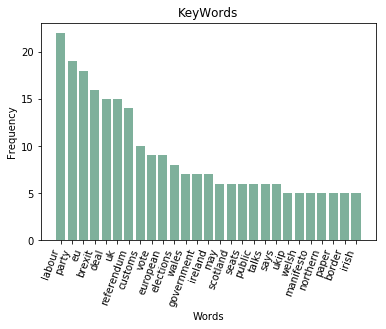

In [14]:
#畫關鍵字詞頻barplot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def barplot(x, y,x_label="", y_label="", title=""): 
    _, ax = plt.subplots()
    
    ax.bar(x,y, color="#7EB09B", align = 'center')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')
    
wrd_cnt = {}
for alist in newset:
    for wrds in alist:
        if wrds not in wrd_cnt:
            wrd_cnt[wrds] = 1
        else:
            wrd_cnt[wrds] += 1
            
key_wrds = {}
for vocab in wrd_cnt.keys():
    if wrd_cnt[vocab] >= 5:
        #print(vocab, wrd_cnt[vocab])
        key_wrds[vocab] = wrd_cnt[vocab]

sort_key_wrds = dict(sorted(key_wrds.items(), key= lambda x:x[1], reverse = True))
#print(sort_key_wrds)

fig = plt.figure(figsize = (12, 6))
barplot(sort_key_wrds.keys(), sort_key_wrds.values(), x_label = 'Words', y_label = 'Frequency', title = 'KeyWords')

print(sort_key_wrds.keys())

In [15]:
#  Transform data
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(newset).transform(newset)
df2 = pd.DataFrame(te_ary, columns = te.columns_) 
#graph = df.T # transpose
#graph.columns = news_frame['title']
df2.rows = news_frame['title']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [16]:
df2.head()

,00,000,04,15,16,1993,2014,2018,2019,30,...,world,worst,worth,wouldn,write,year,yes,you,your,yvette
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [17]:
# 利用支持度篩選關鍵詞
minsup = 0.05
#apriori(graph, min_support = minsup, use_colnames = True) # itemset: 新聞
result = apriori(df2, min_support = minsup, use_colnames = True) # itemset: 單詞
result

,support,itemsets
0,0.0625,(border)
1,0.2000,(brexit)
2,0.0500,(conservatives)
3,0.1250,(customs)
4,0.1875,(deal)
5,0.0500,(election)
6,0.1000,(elections)
7,0.2250,(eu)
8,0.1125,(european)
9,0.0875,(government)


In [18]:
rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(election),(deal),0.0500,0.1875,0.0500,1.000000,5.333333,0.040625,inf
1,(vote),(deal),0.1125,0.1875,0.0875,0.777778,4.148148,0.066406,3.65625
2,(election),(labour),0.0500,0.2750,0.0500,1.000000,3.636364,0.036250,inf
3,(election),(party),0.0500,0.2375,0.0500,1.000000,4.210526,0.038125,inf
4,(elections),(party),0.1000,0.2375,0.0750,0.750000,3.157895,0.051250,3.05000


由上表大概可看出Brexit新聞裡，給定某些單詞出現的情況下，特定單字出現的機率高，且有346組itemset（總樣本數：821)
超過給定Confidence threshold = 0.7

In [19]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(deal),(brexit),0.1875,0.2000,0.0500,0.266667,1.333333,0.012500,1.090909
1,(brexit),(deal),0.2000,0.1875,0.0500,0.250000,1.333333,0.012500,1.083333
2,(referendum),(brexit),0.1750,0.2000,0.0500,0.285714,1.428571,0.015000,1.120000
3,(brexit),(referendum),0.2000,0.1750,0.0500,0.250000,1.428571,0.015000,1.100000
4,(deal),(customs),0.1875,0.1250,0.0625,0.333333,2.666667,0.039062,1.312500


特定單詞的關聯度(lift)高，如：customs & deal, election & deal, (public, referendum)&(labour, party, vote, deal)等
全部樣本皆超過門檻 lift threshold = 1.2，單詞出現的關聯程度高

In [20]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(deal),(brexit),0.1875,0.2000,0.0500,0.266667,1.333333,0.012500,1.090909,1
1,(brexit),(deal),0.2000,0.1875,0.0500,0.250000,1.333333,0.012500,1.083333,1
2,(referendum),(brexit),0.1750,0.2000,0.0500,0.285714,1.428571,0.015000,1.120000,1
3,(brexit),(referendum),0.2000,0.1750,0.0500,0.250000,1.428571,0.015000,1.100000,1
4,(deal),(customs),0.1875,0.1250,0.0625,0.333333,2.666667,0.039062,1.312500,1


In [21]:
# 設定最終篩選條件
out = rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.8) &
       (rules['lift'] > 3) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
89,"(deal, election)",(labour),0.050,0.2750,0.050,1.0,3.636364,0.036250,inf,2
90,"(labour, election)",(deal),0.050,0.1875,0.050,1.0,5.333333,0.040625,inf,2
95,"(deal, election)",(party),0.050,0.2375,0.050,1.0,4.210526,0.038125,inf,2
96,"(party, election)",(deal),0.050,0.1875,0.050,1.0,5.333333,0.040625,inf,2
100,"(deal, party)",(labour),0.075,0.2750,0.075,1.0,3.636364,0.054375,inf,2


Support Mean:         0.05575   Support Median:         0.05000
Confidence Mean:    0.66896   Confidence Median:    0.66667
Sample:  730


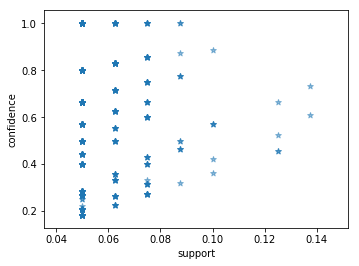

In [22]:

support = rules['support']
confidence = rules['confidence']

fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)

ax1.scatter(support, confidence, alpha=0.5, marker="*") #alpha : 設定透明度
ax1.set_xlabel('support')
ax1.set_ylabel('confidence') 

print("Support Mean: %15.5f" % support.mean(), "  Support Median: %15.5f" % support.median())
#print("Lift Mean: %21.5f" % lift.mean(), "  Lift Median: %22.5f" % lift.median())
print("Confidence Mean: %10.5f" % confidence.mean(), "  Confidence Median: %10.5f" % confidence.median())
print("Sample: ", np.shape(rules)[0])

接下來進一步視覺化不同新聞使用的單詞關聯性，欲藉正負面單詞的使用區分新聞的正負面程度

In [23]:
import networkx as nx
G = nx.DiGraph() #建立一個空graph，有方向性
for i in range(len(news_frame)):
    G.add_node(i) #80則新聞：80個nodes
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    #print(currentFrom[0], currentTo[0])
    G.add_edge(currentFrom[0], currentTo[0])
    '''for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0]) #currentTo是只含一個單詞的list
        #print(currentFrom[0], currentTo[0])'''

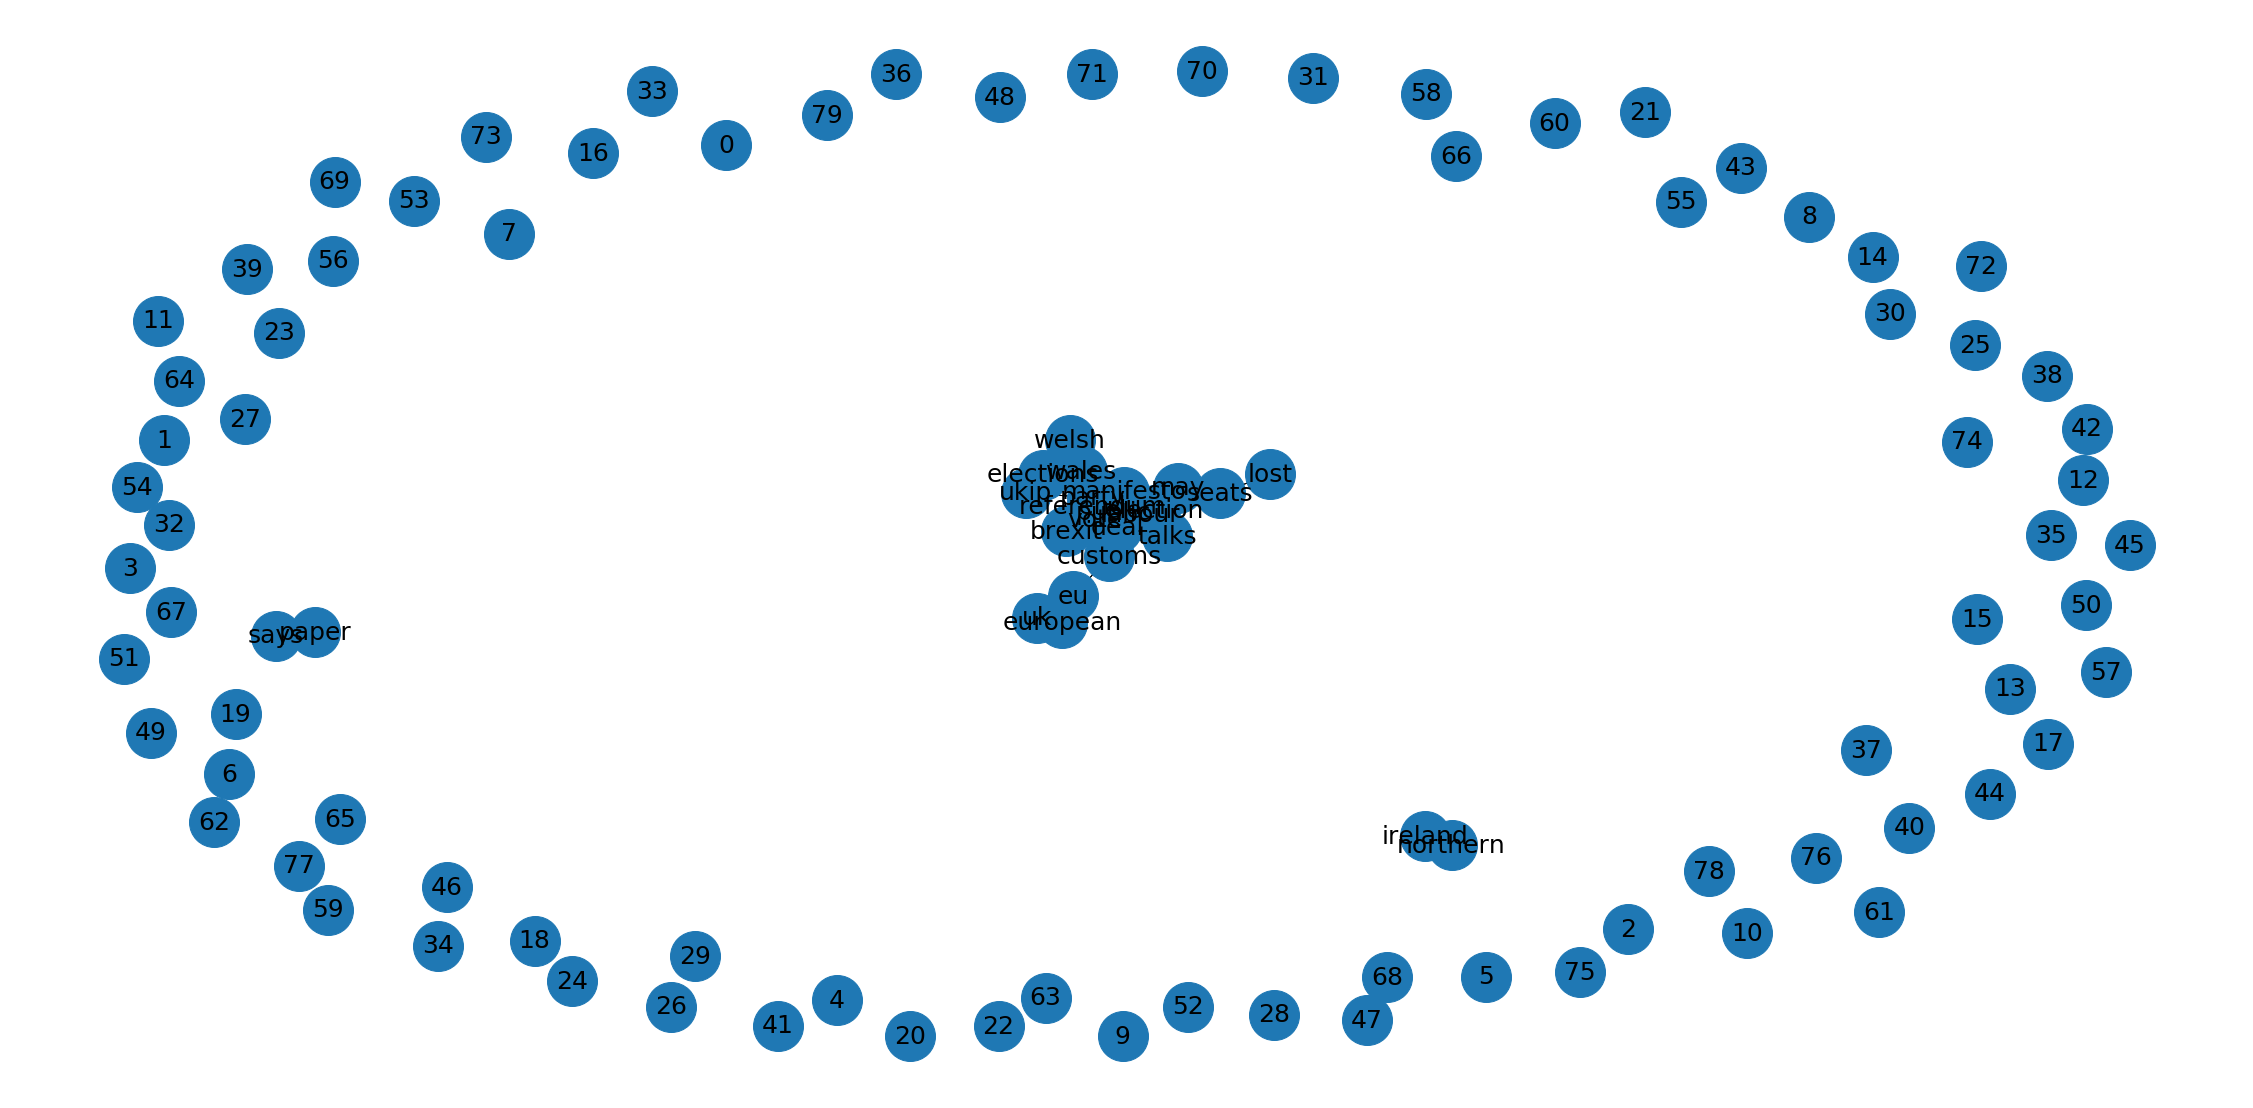

In [24]:
plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=2500)
nx.draw_networkx_edges(G, pos, width=1)

# labels
nx.draw_networkx_labels(G,pos,font_size=25,font_family='sans-serif')

plt.axis('off')
#plt.savefig("weighted_graph.png") # save as png
plt.show()

結論：共現圖呈現關鍵詞群聚的現象，且無明顯正負面單詞群聚現象，頂多只能看出某些重點議題：北愛爾蘭邊界問題、國會席次、政黨(Labour Party, UKIP)等（見下方dominating_set）

＃可能無法單純判斷正負面單詞，但可以試著用特定議題的發生觀察對ETF價格及成交量的影響（例如北愛爾蘭議題新聞發生時價格及成交量的反應）

In [25]:
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{('customs', 'eu'),
 ('deal', 'brexit'),
 ('election', 'party'),
 ('european', 'uk'),
 ('ireland', 'northern'),
 ('public', 'vote'),
 ('referendum', 'labour'),
 ('says', 'paper'),
 ('seats', 'lost'),
 ('wales', 'welsh')}